<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [30]:
# loading the data: Wholesale customers data
data = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

#what does each column mean?
# Channel: 1 = Horeca (Hotel/Restaurant/Cafe), 2 = Retail
# Region: 1 = Lisnon, 2 = Oporto, 3 = Other
# Fresh: annual spending (m.u.) on fresh products
# Milk: annual spending (m.u.) on milk products
# Grocery: annual spending (m.u.) on grocery products
# Frozen: annual spending (m.u.) on frozen products
# Detergents_Paper: annual spending (m.u.) on detergents and paper products
# Delicassen: annual spending (m.u.) on delicatessen products

In [11]:
# Any Categorical columns to convert?
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if len(categorical_cols) > 0:
    print("Categorical columns detected:", categorical_cols)
else:
    print("No categorical columns detected.")

No categorical columns detected.


In [12]:
# checking missing values
missing_values = data.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values detected.")                
else:
    print("Missing values detected:")

No missing values detected.


Text(0.5, 1.0, 'Correlation Matrix')

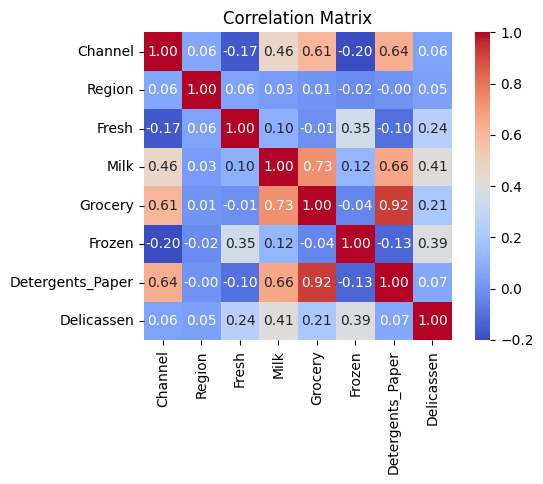

In [15]:
#column collinearity - any high correlation?
correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

In [28]:
print(data.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


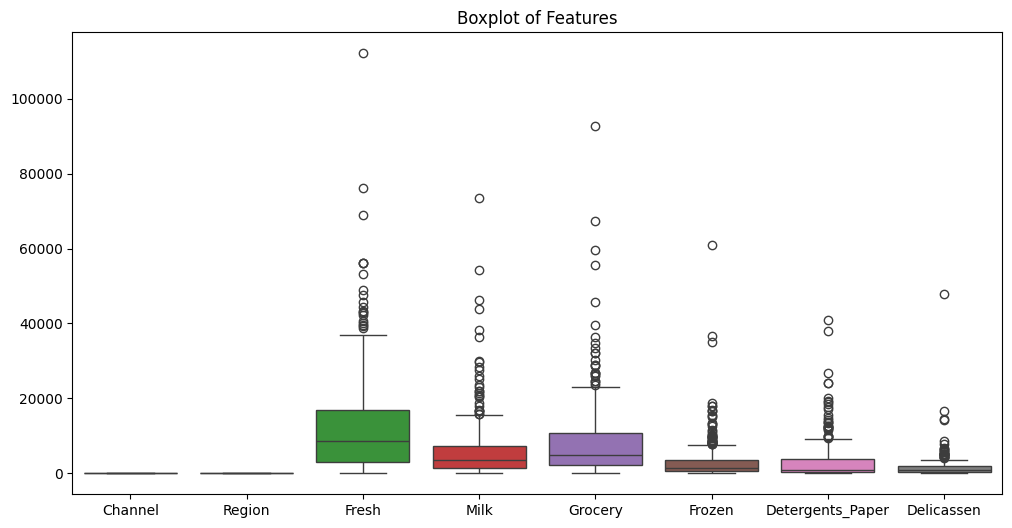

In [ ]:
#Discriptive statistics - any outliners to remove?
data.describe()
# checking for outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="v")
plt.title('Boxplot of Features')
plt.show()        

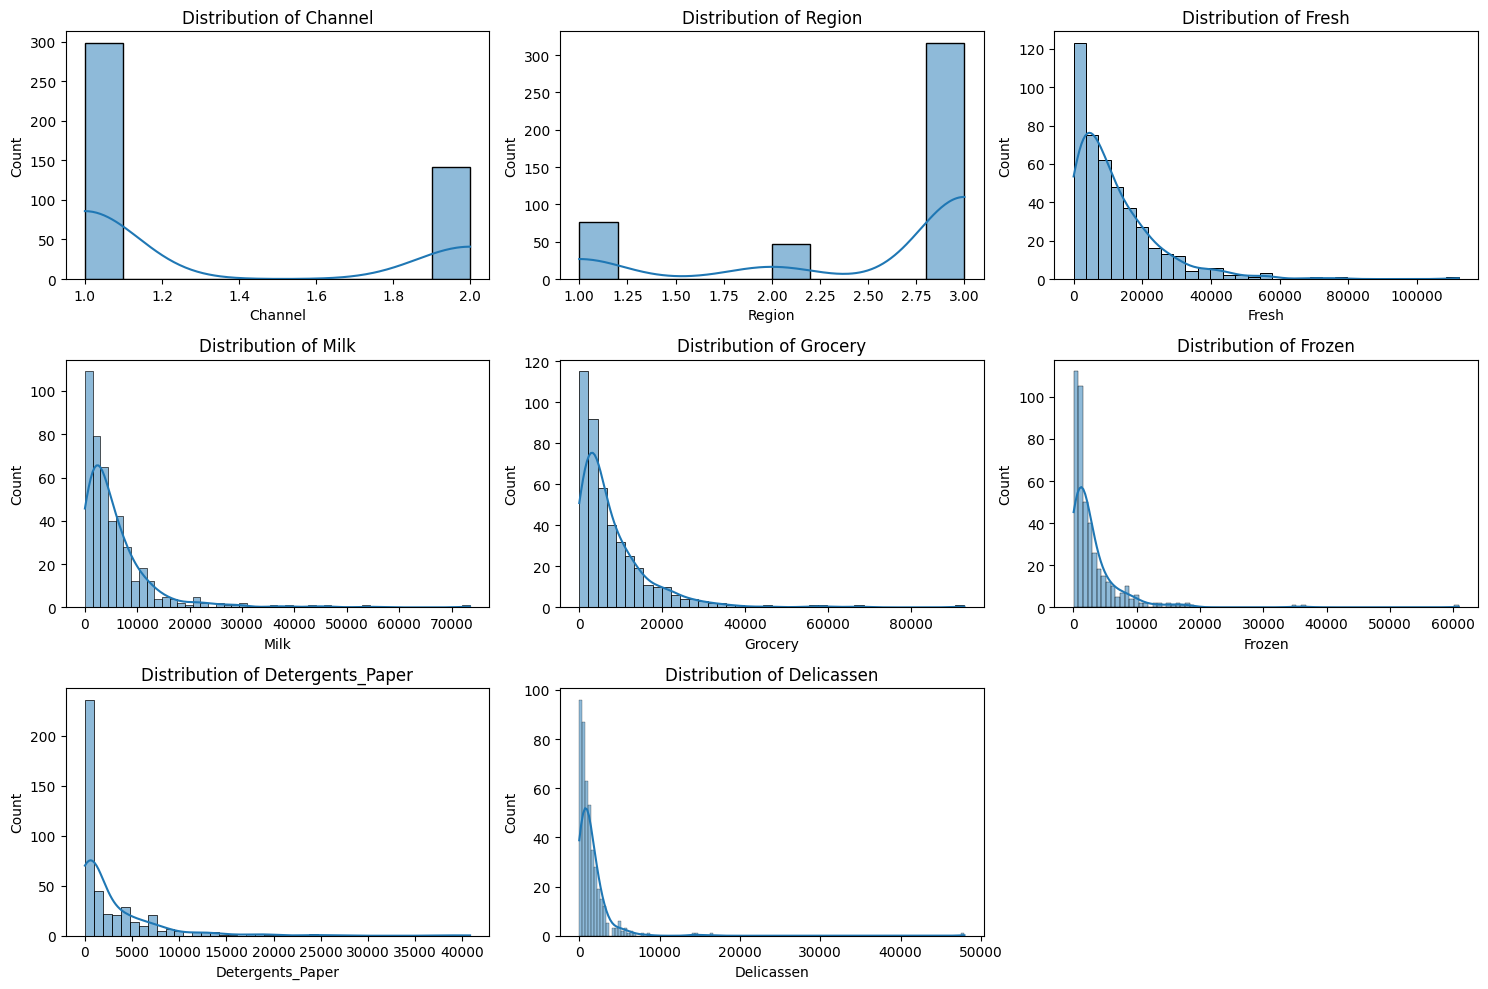

In [31]:
# Column wise data distribution - is there any data skewness?
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

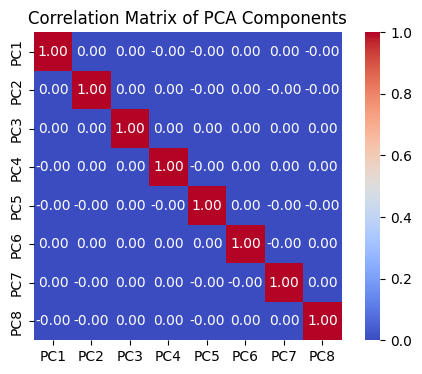

In [39]:
# Your code here
# No missing data
# NO categorical data
# No outliners
# No data Skewness
# Collinearity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Apply PCA
pca = PCA(n_components= 8)
data_pca = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
correlation_matrix = pca_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of PCA Components')
plt.show()

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [43]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data)
print(customers_scale)



[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [44]:
from sklearn.cluster import KMeans

# Your code here:

### Looking to the elbow we can choose 2 like the correct number of clusters

In [45]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [50]:
customers = data.copy()
customers['Label'] = clusters

Count the values in `labels`.

In [52]:
# Your code here:
count = customers['Label'].value_counts()
print(count)
#print(customers)

Label
0    302
1    138
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [94]:
from sklearn.cluster import DBSCAN 

# Your code here
dbscan = DBSCAN(eps=0.5, min_samples= 5).fit(customers_scale)
labels = dbscan.labels_
clusters = dbscan.labels_.tolist()
customers['Label_DBSCAN'] = clusters
print(customers['Label_DBSCAN'].value_counts())


Label_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 3      5
 0      5
 7      5
Name: count, dtype: int64


Count the values in `labels_DBSCAN`.

In [60]:
# Your code here
count_dbscan = customers['Label_DBSCAN'].value_counts()
print(count_dbscan)
#print(customers)


Label_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 3      5
 0      5
 7      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [79]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    #plt.title('Detergents Paper vs Milk ')
    #return plt.show();

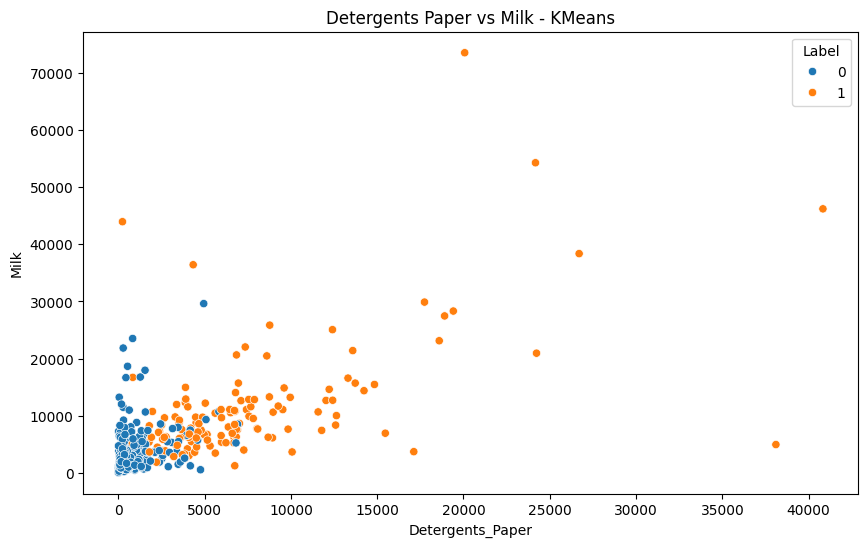

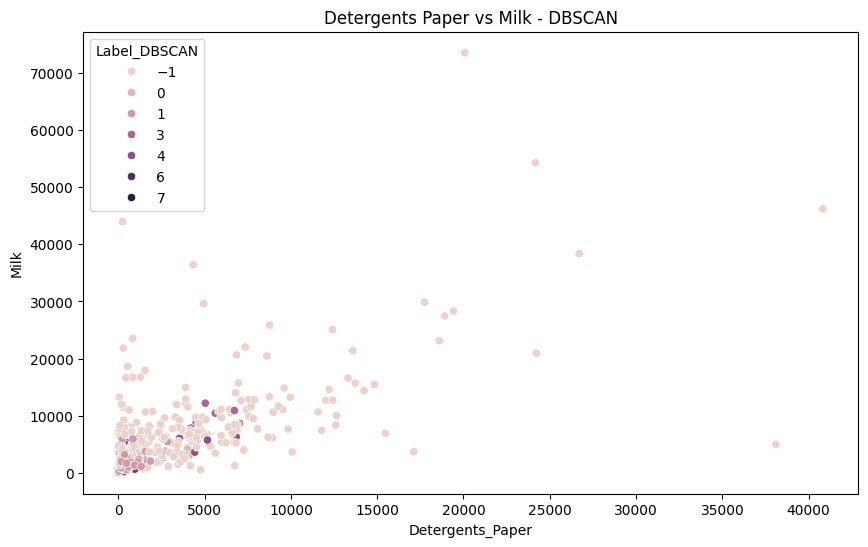

In [83]:
# Your code here:
plt.figure(figsize=(10, 6))
plot(data['Detergents_Paper'], data['Milk'], customers['Label'])
plt.title('Detergents Paper vs Milk - KMeans')
plt.figure(figsize=(10, 6))
plot(data['Detergents_Paper'], data['Milk'], customers['Label_DBSCAN'])
plt.title('Detergents Paper vs Milk - DBSCAN')
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

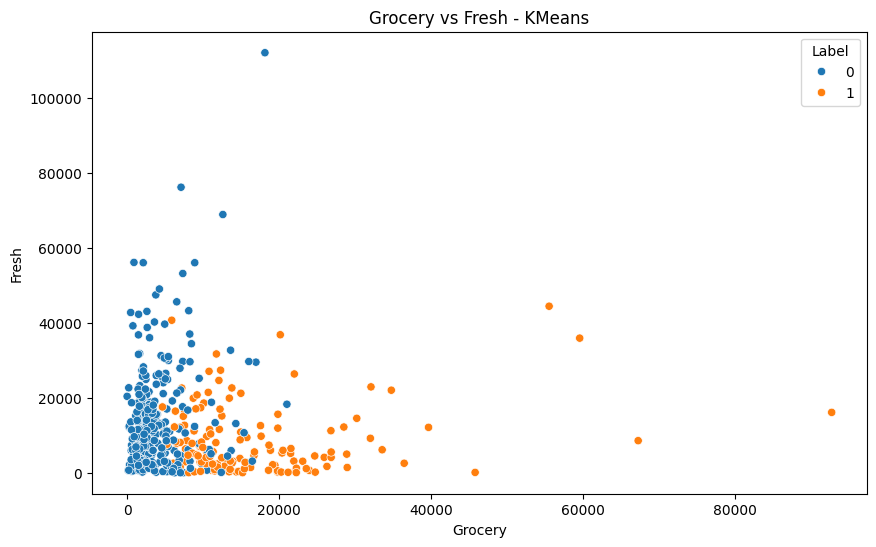

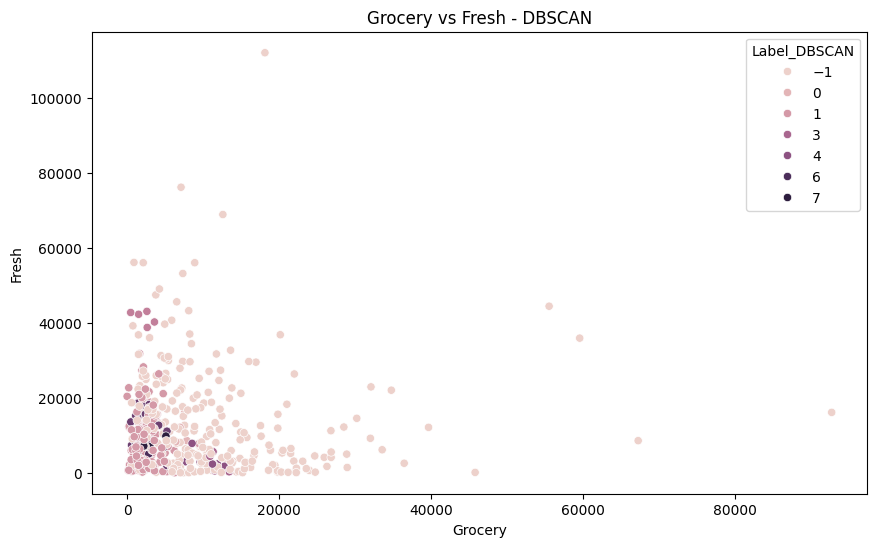

In [84]:
# Your code here:
plt.figure(figsize=(10, 6))
plot(data['Grocery'], data['Fresh'], customers['Label'])
plt.title('Grocery vs Fresh - KMeans')
plt.figure(figsize=(10, 6))
plot(data['Grocery'], data['Fresh'], customers['Label_DBSCAN'])
plt.title('Grocery vs Fresh - DBSCAN')
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

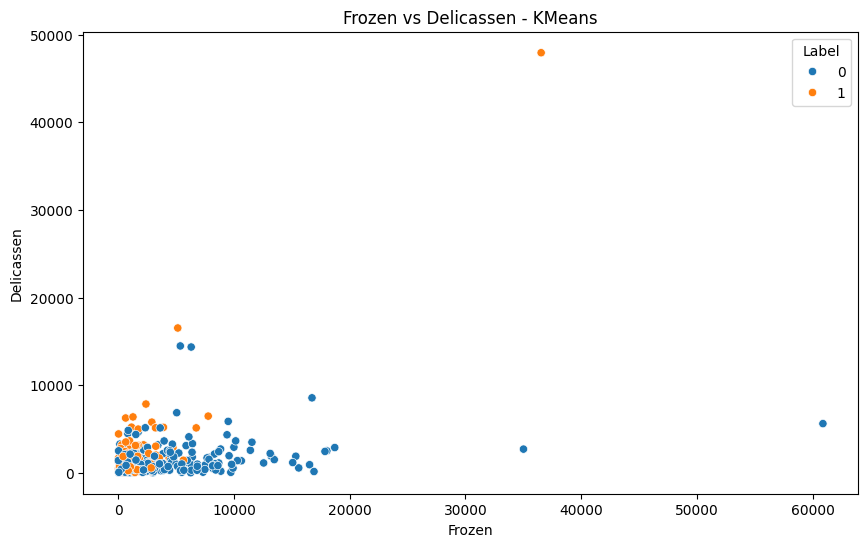

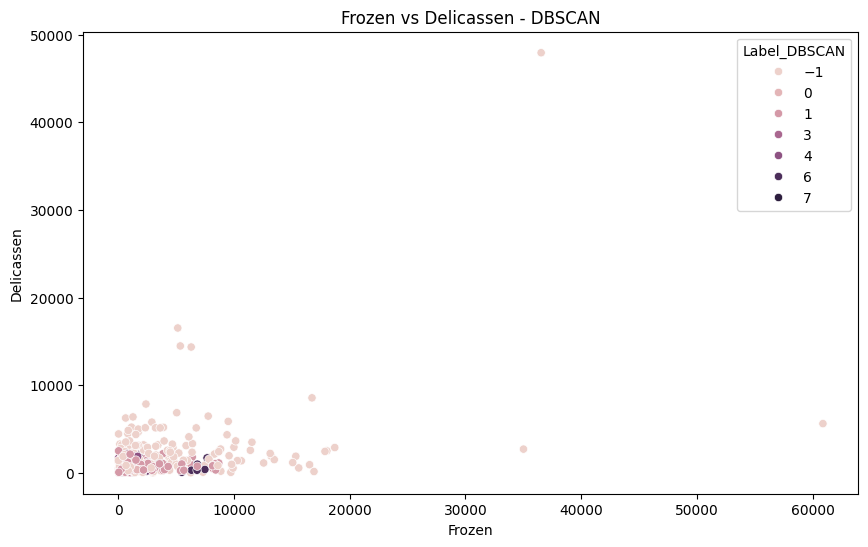

In [85]:
# Your code here:
plt.figure(figsize=(10, 6))
plot(data['Frozen'], data['Delicassen'], customers['Label'])
plt.title('Frozen vs Delicassen - KMeans')
plt.figure(figsize=(10, 6))
plot(data['Frozen'], data['Delicassen'], customers['Label_DBSCAN'])
plt.title('Frozen vs Delicassen - DBSCAN')
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [88]:
# Your code here:
# Group by KMeans labels and compute means
kmeans_group_means = customers.groupby('Label').mean()
print("\nMeans by KMeans clusters:\n", kmeans_group_means)

# Group by DBSCAN labels and compute means
dbscan_group_means = customers.groupby('Label_DBSCAN').mean()
print("\nMeans by DBSCAN clusters:\n", dbscan_group_means)



Means by KMeans clusters:
         Channel    Region         Fresh          Milk       Grocery  \
Label                                                                 
0      1.016556  2.500000  13451.589404   3308.529801   3919.364238   
1      1.992754  2.637681   8824.282609  11240.442029  16774.739130   

            Frozen  Detergents_Paper   Delicassen  Label_DBSCAN  
Label                                                            
0      3671.261589        789.718543  1270.619205      0.619205  
1      1760.355072       7459.144928  2081.275362     -0.565217  

Means by DBSCAN clusters:
                Channel   Region         Fresh          Milk       Grocery  \
Label_DBSCAN                                                                
-1            1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0            2.000000  3.00000  11401.000000   3536.200000   6729.000000   
 1            1.000000  3.00000   9128.823077   1862.438462   2423.530769   
 2        

Which algorithm appears to perform better?

**Your observations here**

- Based on the group means and scatter plots, KMeans produces two well-separated clusters that align with spending patterns (e.g., high vs. low spenders).
- DBSCAN, however, creates many small clusters and a large number of noise points (-1), which may not be meaningful for this dataset.
- Therefore, KMeans performs better for this data, as it provides clearer and more interpretable clusters.


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

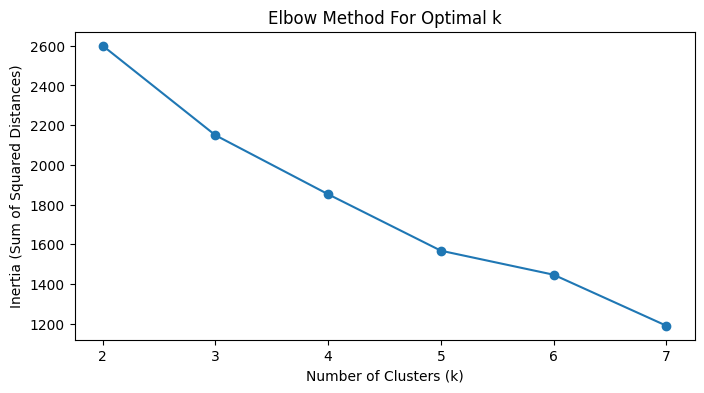

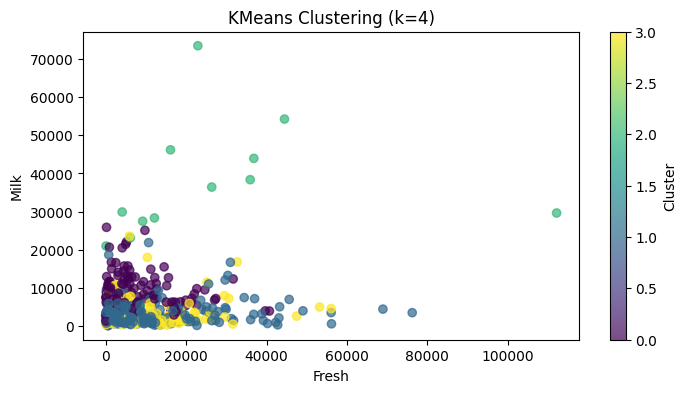

In [104]:
# Your code here:
# Evaluate KMeans clustering for different numbers of clusters and visualize with scatter plots

inertia = []
cluster_range = range(2, 8)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to choose optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Visualize clustering for a chosen k (e.g., k=3)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(customers_scale)

plt.figure(figsize=(8,4))
plt.scatter(data['Fresh'], data['Milk'], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title(f'KMeans Clustering (k={k})')
plt.colorbar(label='Cluster')
plt.show()

**Your comment here**

- As k increases, the inertia (sum of squared distances) decreases, but the rate of decrease slows down after a certain point (the "elbow").
- For this dataset, the elbow plot suggests that 2 or 3 clusters may be optimal, as the inertia reduction becomes less significant beyond these values.
- With k=2, clusters are broad and may group together customers with different spending patterns.
- Increasing k to 3 or 4 creates more specific clusters, potentially capturing more nuanced customer segments, but may also lead to overfitting or splitting meaningful groups.
- Visual inspection of scatter plots for different k values helps to identify the most interpretable and well-separated clusters.
- Choosing too high a k can result in clusters with very few members, which may not be meaningful for business insights.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

Label_DBSCAN
 0    428
-1     12
Name: count, dtype: int64


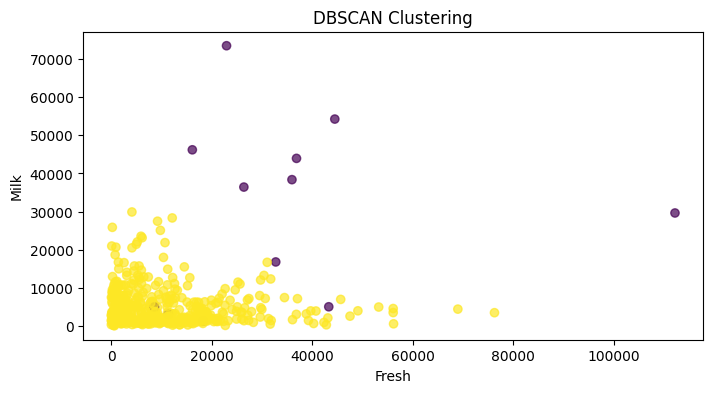

In [122]:
# Your code here
dbscan = DBSCAN(eps=3, min_samples= 5).fit(customers_scale)
labels = dbscan.labels_
clusters = dbscan.labels_.tolist()
customers['Label_DBSCAN'] = clusters
print(customers['Label_DBSCAN'].value_counts())
plt.figure(figsize=(8,4))
plt.scatter(data['Fresh'], data['Milk'], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title(f'DBSCAN Clustering')
plt.show()

**Your comment here**

- When changing the `eps` and `min_samples` parameters in DBSCAN, you will observe the following effects in the plot:

- **Increasing `eps`**: More points are grouped into clusters, reducing the number of noise points (labeled as -1). Clusters may become larger and less dense.
- **Decreasing `eps`**: Fewer points are included in clusters, increasing the number of noise points. Clusters become smaller and more compact.
- **Increasing `min_samples`**: Clusters require more points to form, so fewer clusters may be detected, and more points may be labeled as noise.
- **Decreasing `min_samples`**: Clusters can form with fewer points, potentially resulting in more clusters, including small or spurious ones.

**Overall observation:**  
The DBSCAN plot changes significantly with these parameters. If `eps` is too small or `min_samples` is too high, most points are labeled as noise. If `eps` is too large or `min_samples` is too low, clusters may merge or become less meaningful. The best parameters depend on the data distribution and desired cluster density.